In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.dates as mdates
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import csv 
import cufflinks as cf
from plotly.offline import iplot

%matplotlib inline

In [2]:
df_red = pd.read_csv('winequality-red.csv' , sep=';')
df_white = pd.read_csv('winequality-white.csv' , sep = ';')

In [3]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
df_red['color'] = 'red'
df_white['color'] = 'white'

In [6]:
df_merged = pd.concat([df_red,df_white], axis = 0)
df_merged

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


<AxesSubplot:xlabel='quality', ylabel='Count'>

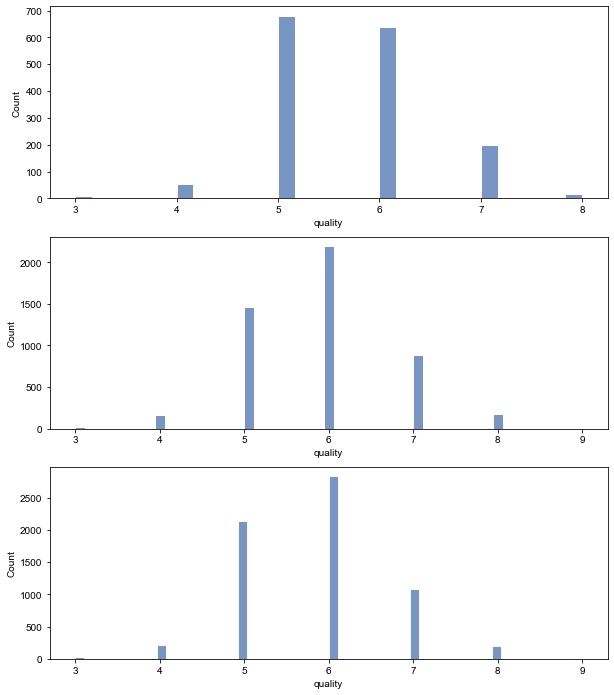

In [7]:
fig , axes = pt.subplots(3,1 , figsize = (10,12))
sns.set_theme(style="darkgrid")
sns.histplot( x = 'quality' , data = df_red , ax=axes[0] )
sns.histplot( x = 'quality' , data = df_white , ax=axes[1])
sns.histplot( x = 'quality' , data = df_merged , ax=axes[2])

In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [9]:
# Answer 2

In [10]:
df_merged['sulphates'].describe()

count    6497.000000
mean        0.531268
std         0.148806
min         0.220000
25%         0.430000
50%         0.510000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64

<AxesSubplot:xlabel='sulphates'>

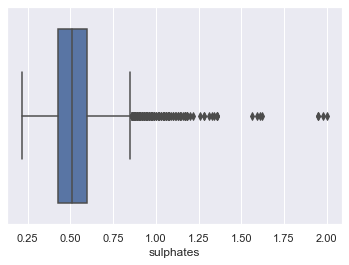

In [11]:
sns.boxplot(x = 'sulphates' , data = df_merged)

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

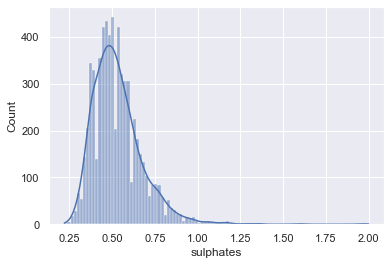

In [12]:
sns.histplot(x = 'sulphates' , kde = True, data = df_merged)

In [13]:
df_merged['alcohol'].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

<AxesSubplot:xlabel='alcohol'>

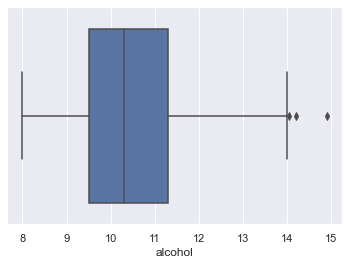

In [14]:
sns.boxplot(x = 'alcohol' , data = df_merged)

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

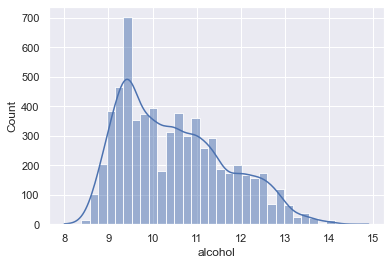

In [15]:
sns.histplot(x = 'alcohol' , kde = True, data = df_merged)

<AxesSubplot:>

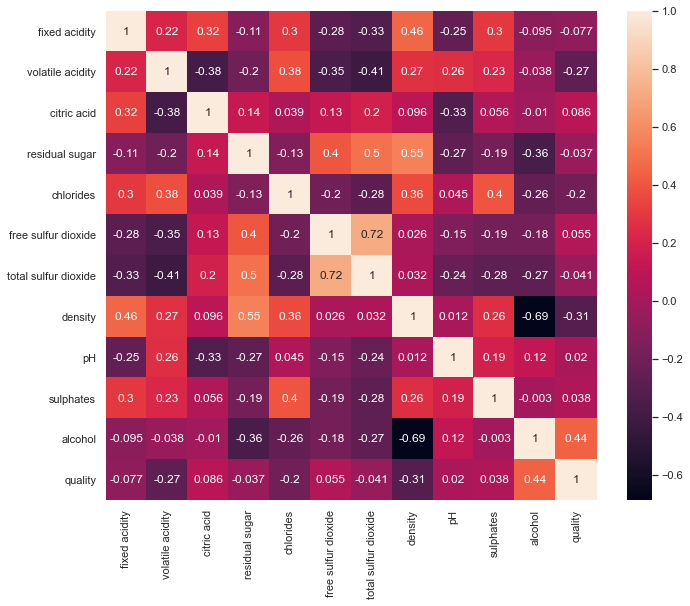

In [16]:
fig, ax = pt.subplots(figsize = (11,9))
df_merged_corr = df_merged.corr()
sns.heatmap(data=df_merged_corr , annot=True )

In [17]:
# Answer 3

In [18]:
attributes = df_merged[['density', 'total sulfur dioxide', 'residual sugar',  'fixed acidity','color']]


<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

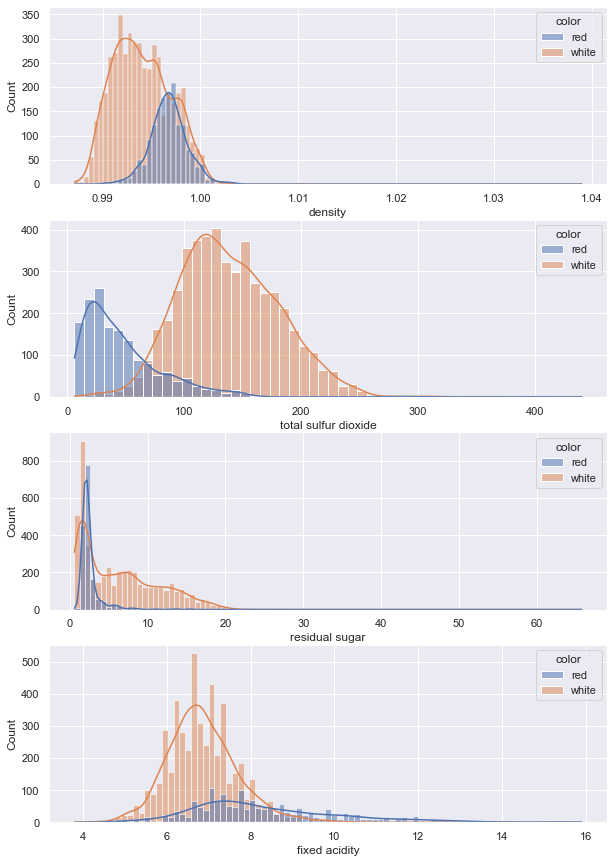

In [19]:
fig, axes = pt.subplots(4,1, figsize=(10,15))
sns.histplot( x = 'density', hue = 'color' ,kde=True, data=attributes, ax=axes[0])
sns.histplot( x = 'total sulfur dioxide', hue = 'color' ,kde=True, data=attributes, ax=axes[1])
sns.histplot( x = 'residual sugar', hue = 'color' ,kde=True, data=attributes, ax=axes[2])
sns.histplot( x = 'fixed acidity', hue = 'color' ,kde=True, data=attributes, ax=axes[3])

### red wine have significantly higher density
### white wine have significantly higher sulfer dioxide
### white wine tend to have more sugar content
### white wine will have much less acidity

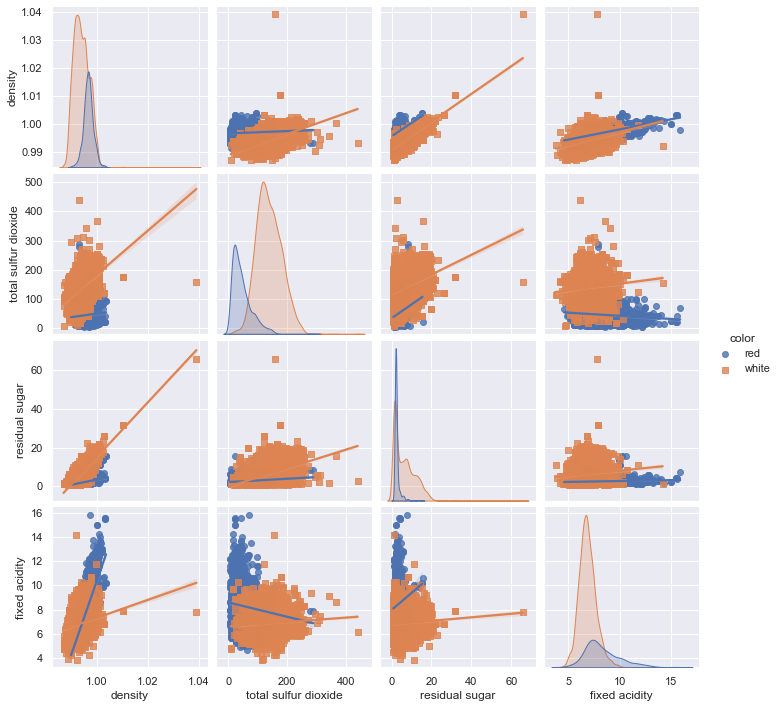

In [20]:
sns.pairplot(attributes , hue = 'color' , kind = 'reg' ,  markers=["o", "s"])

<AxesSubplot:>

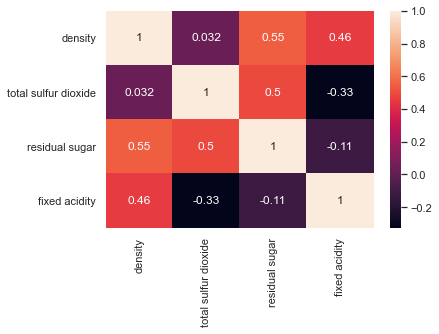

In [21]:
attributes_corr = attributes.corr()
sns.heatmap(attributes_corr , annot=True)

In [22]:
# Answer 4

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

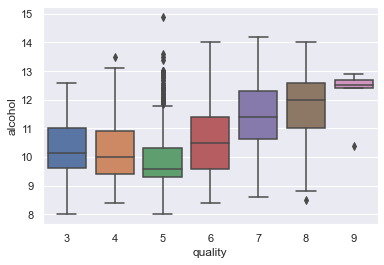

In [23]:
sns.boxplot(data = df_merged , x = 'quality' , y = 'alcohol')